# **Time Series EDA**

In [1]:
pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [6]:
pip install yfinance


In [18]:
import yfinance as yf

# Fetch data for TSLA
df_tesla = yf.download('TSLA', start='2017-01-01',end='2022-02-24')

print(df_tesla.tail())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

              Volume  
Date                  
2022-02-16  51294300  
2022-02-17  55178400  
2022-02-18  68501700  
2022-02-22  83288100  
2022-02-23  95256900  


<Axes: xlabel='Date'>

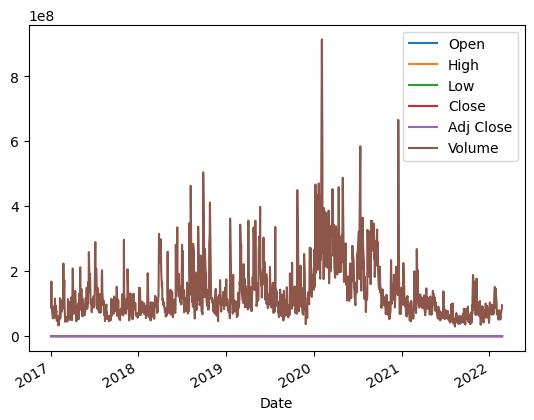

In [19]:
df_tesla.plot()

<Axes: xlabel='Date'>

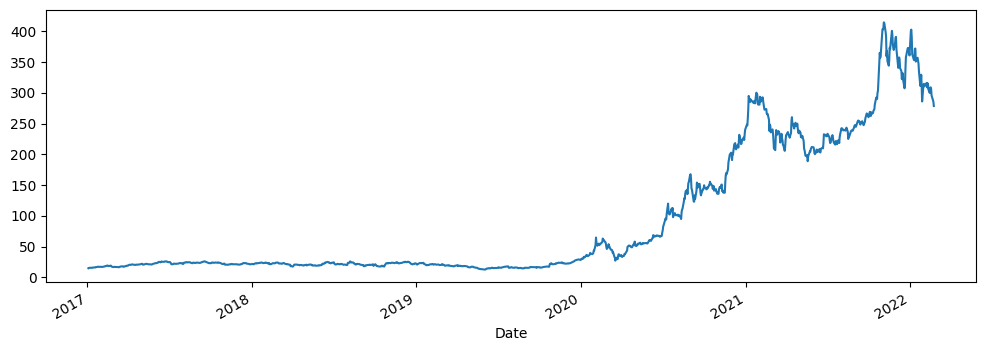

In [20]:
df_tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

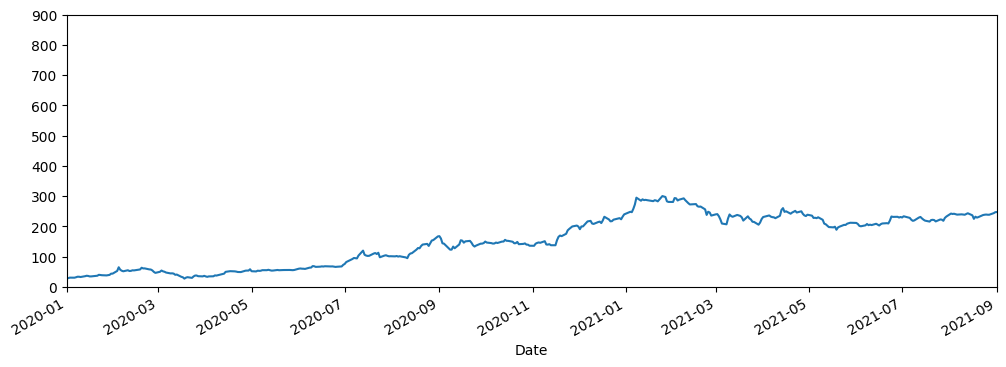

In [23]:
# xlimit and ylimit
df_tesla['High'].plot(xlim=[pd.to_datetime('2020-01-01'), pd.to_datetime('2021-09-01')], ylim=[0, 900], figsize=(12, 4))

In [24]:
df_tesla.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', name='Date', length=1295, freq=None)

In [27]:
#reading the n rows
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [28]:
share_open.head()

Date
2020-01-02    28.299999
2020-01-03    29.366667
2020-01-06    29.364668
2020-01-07    30.760000
2020-01-08    31.580000
Name: Open, dtype: float64

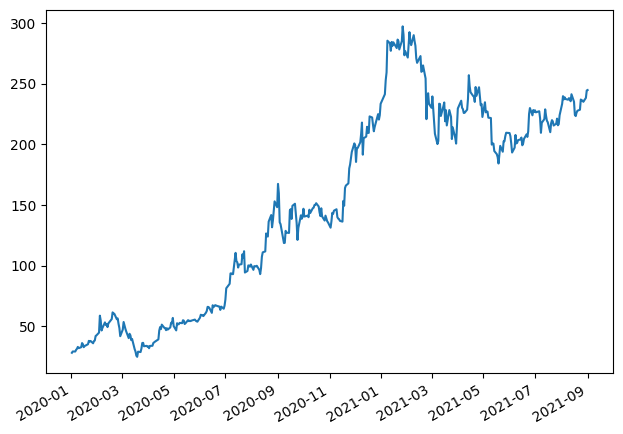

In [31]:
import matplotlib.pyplot as plt

figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [32]:
## Datetime Index

In [39]:
tesla_df = df_tesla.reset_index()

In [40]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1295 non-null   datetime64[ns]
 1   Open       1295 non-null   float64       
 2   High       1295 non-null   float64       
 3   Low        1295 non-null   float64       
 4   Close      1295 non-null   float64       
 5   Adj Close  1295 non-null   float64       
 6   Volume     1295 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 70.9 KB


In [41]:
# reset
tesla_df = tesla_df.set_index('Date',drop=True)

In [42]:
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


# **Time Resampling**

In [44]:
#year end sale
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,276.809998,278.433319,253.520004,254.679993,254.679993,50729100


In [45]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


<Axes: xlabel='Date'>

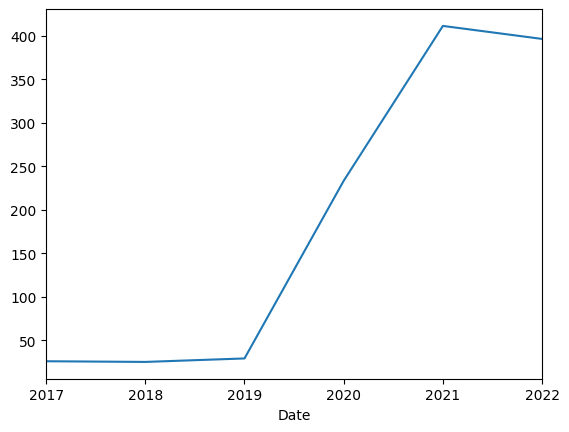

In [46]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [47]:
# quarterly start frequency
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.687332,19.159332,18.573999,18.732000,18.732000,223728000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

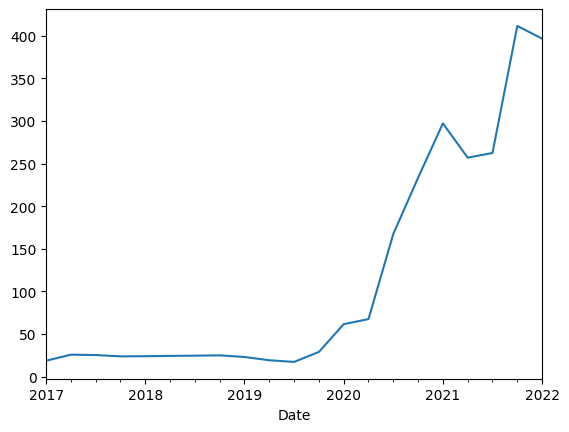

In [48]:
df_tesla.resample(rule='QS').max()['Open'].plot()

<Axes: xlabel='Date'>

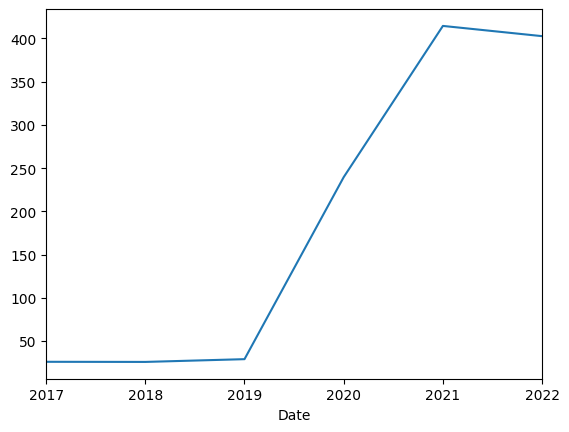

In [49]:
# Business end frequency
df_tesla.resample(rule='BA').max()['High'].plot()

In [50]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.687332,19.159332,18.573999,18.732000,18.732000,223728000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

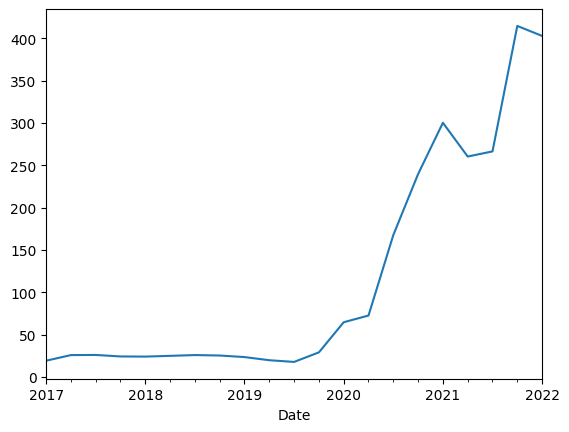

In [51]:
df_tesla.resample(rule='BQS').max()['High'].plot()

<Axes: xlabel='Date'>

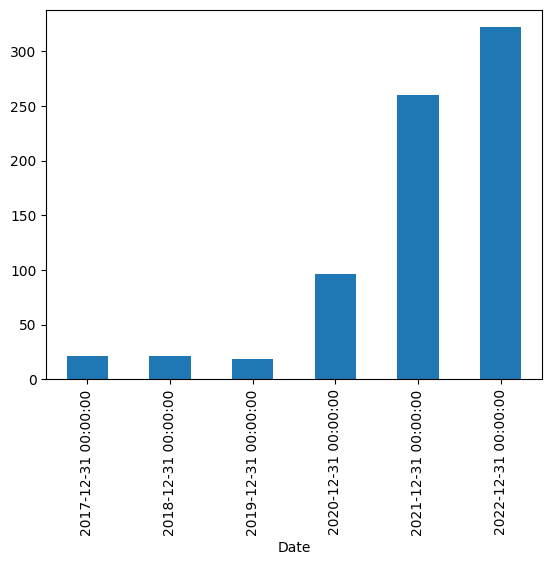

In [52]:
##plotting

df_tesla['Open'].resample(rule = 'A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

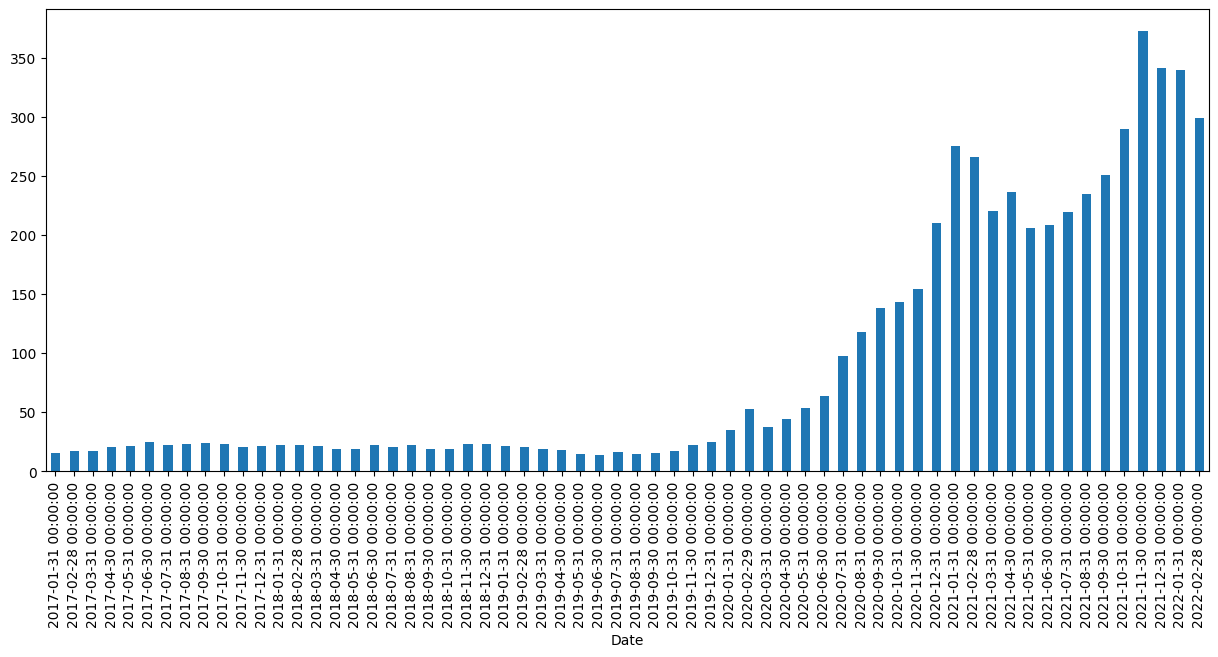

In [54]:
df_tesla['Open'].resample(rule = 'M').mean().plot(kind='bar',figsize=(15,6))

In [55]:
df_tesla['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [56]:
df_tesla['High'].rolling(10).mean()

Date
2017-01-03           NaN
2017-01-04           NaN
2017-01-05           NaN
2017-01-06           NaN
2017-01-09           NaN
                 ...    
2022-02-16    310.063669
2022-02-17    309.447000
2022-02-18    307.792667
2022-02-22    304.757999
2022-02-23    301.724997
Name: High, Length: 1295, dtype: float64

In [59]:
df_tesla["Open: 30 days rolling"] = df_tesla["Open"].rolling(30).mean()

In [61]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300,321.660554
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400,319.067332
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700,316.945110
2022-02-22,278.043335,285.576660,267.033325,273.843323,273.843323,83288100,314.209111
2022-02-23,276.809998,278.433319,253.520004,254.679993,254.679993,95256900,312.324999


<Axes: xlabel='Date'>

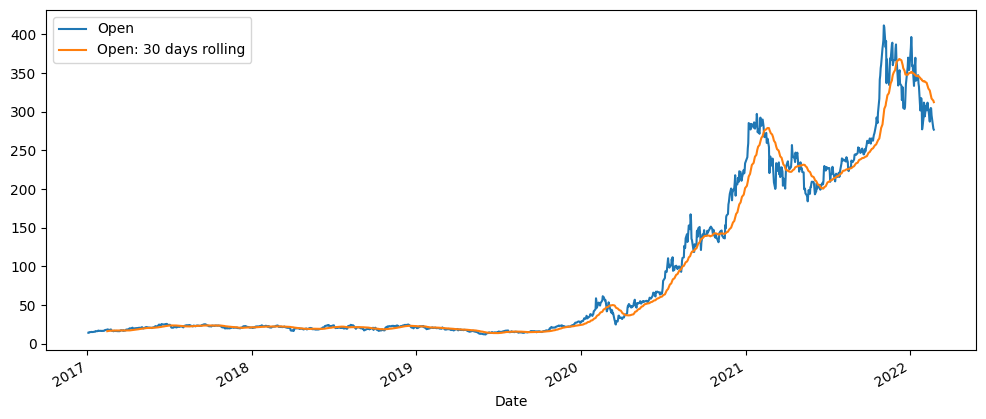

In [63]:
df_tesla[['Open',"Open: 30 days rolling"]].plot(figsize=(12,5))